#### Actividad en Clase 1

##### Parte 1

Utilizando OpenCV:

1. Carga la imagen "gato.webp" a color.
2. Separa los canales R, G, B.
3. Muestra en un histograma los valores de cada canal por separado.
4. Transforma la imagen a:
- Escala de grises
- HSV
- YCbCr
5. Muestra el histograma en los canales de luminancia (grises, V, Y) respectivamente

In [8]:
import matplotlib.pyplot as plt

def mostrar(img, titulo):
    hist = np.histogram(img, bins=256, range=(0, 255))[0]
    fig, axs = plt.subplots(1, 2, figsize=(15, 4))

    axs[0].imshow(img, cmap='gray', vmin=0, vmax=255)
    axs[0].set_title(titulo)
    axs[0].axis('off')

    axs[1].plot(hist, color='black')
    axs[1].set_title("Histograma")
    axs[1].set_xlim(0, 255)

    plt.tight_layout()
    plt.show()


def mostrar_color(img, title=""):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.hist(img.ravel(), bins=256, range=(0, 256), color='black')
    plt.title("Histograma")
    plt.tight_layout()
    plt.show()

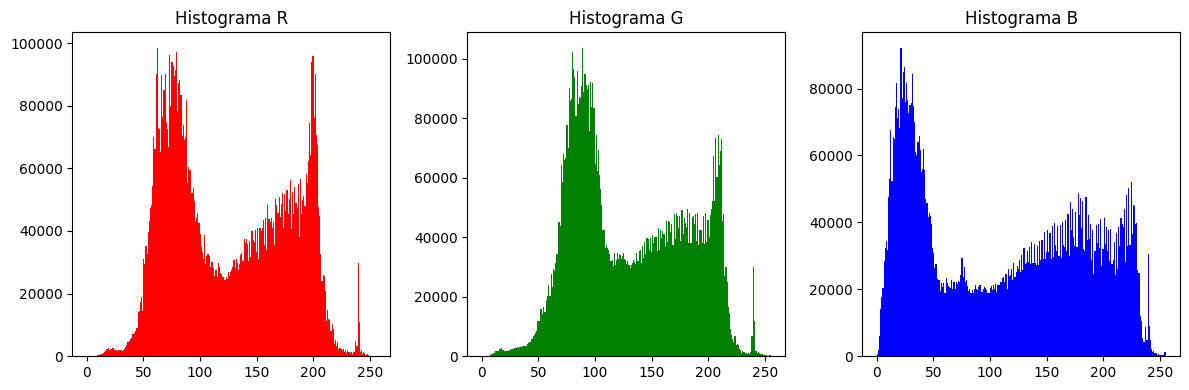

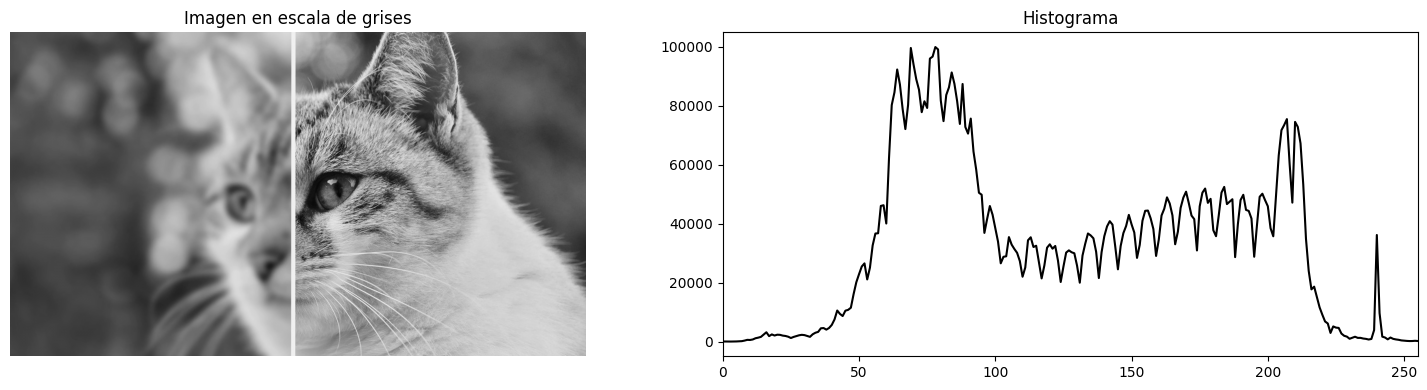

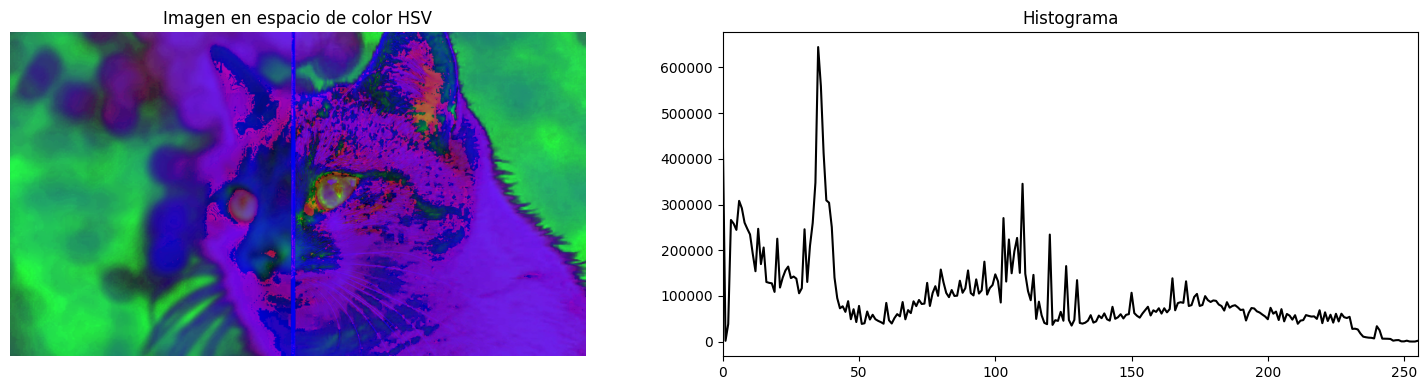

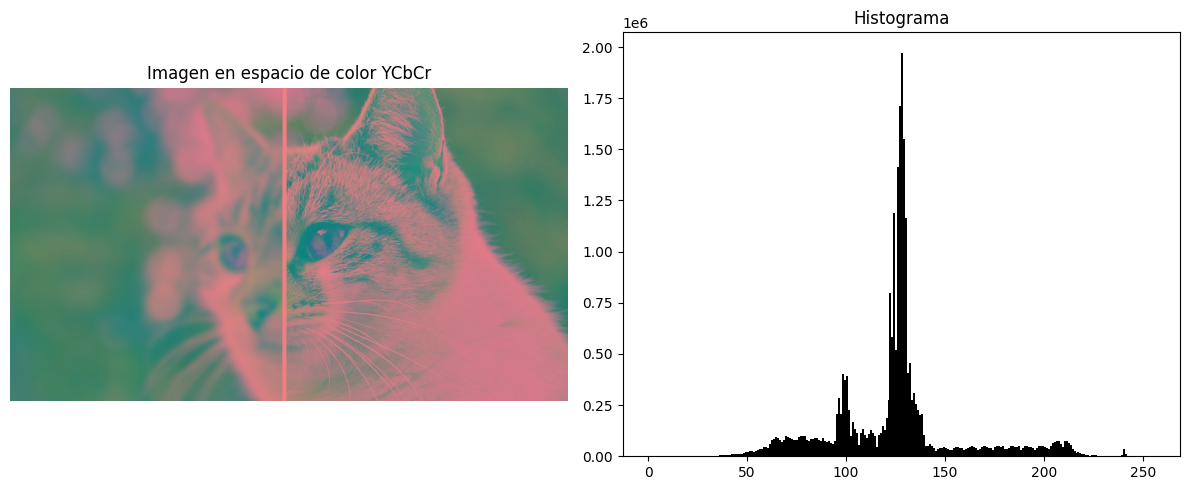

In [9]:
import cv2
import numpy as np 


img = cv2.imread('gato.webp')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

r, g, b = cv2.split(img_rgb)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.hist(r.ravel(), bins=256, color='red')
plt.title('Histograma R')

plt.subplot(1, 3, 2)
plt.hist(g.ravel(), bins=256, color='green')
plt.title('Histograma G')

plt.subplot(1, 3, 3)
plt.hist(b.ravel(), bins=256, color='blue')
plt.title('Histograma B')

plt.tight_layout()
plt.show()


img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

mostrar(img_gray, "Imagen en escala de grises")
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

mostrar(img_hsv, "Imagen en espacio de color HSV")
img_ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)

mostrar_color(img_ycrcb, "Imagen en espacio de color YCbCr")



##### Parte 2

Usando OpenCV: 

1. Aplica los siguientes filtros sobre la imagen "gato.webp" en escala de grises:

- Suavizado (blur): Promedio y Gaussiano
- Sharpen
- Detección de bordes (Sobel X, Y)
- High-Pass

2. Crea una grilla comparativa 2×3 (original + 5 filtradas)

3. Responde a la pregunta: ¿Que filtro te parece que conserva mejor los detalles? ¿Cuál reduce el ruido?

- ¿Qué filtro conserva mejor los detalles?

Sharpen (Afilado) es el filtro que mejor conserva e incluso resalta los detalles. Esto se nota en la nitidez de los bordes del pelaje, los ojos y los contornos faciales del gato. Este filtro realza las zonas con cambios de intensidad, haciendo que los detalles sean más evidentes.

¿Cuál reduce más el ruido?

- Blur Gaussiano es el que mejor reduce el ruido. suaviza con pesos distribuidos suavemente hace que las pequeñas variaciones (como el grano o artefactos) se difuminen sin eliminar completamente la forma general de los objetos.

Tamaño: 3840x2160


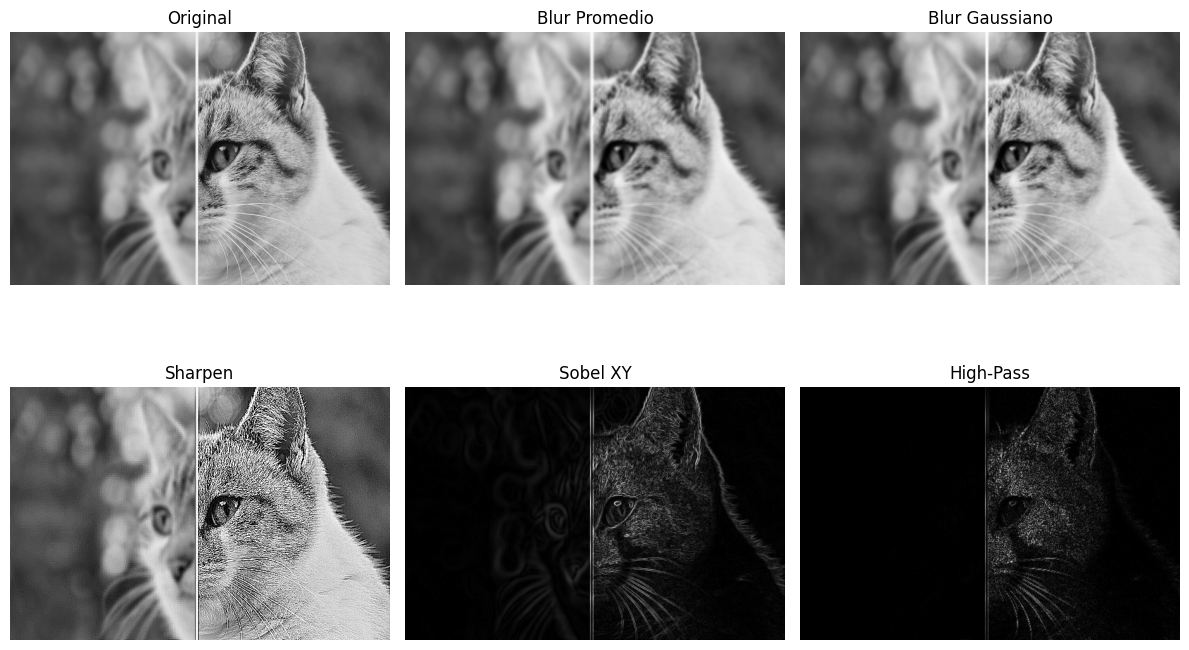

In [108]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("gato.webp", cv2.IMREAD_GRAYSCALE)

alto, ancho = img.shape[:2]
print(f"Tamaño: {ancho}x{alto}")

nuevo_tamano = (600, 400)

img = cv2.resize(img, nuevo_tamano)


blur_avg = cv2.blur(img, (5, 5))

blur_gauss = cv2.GaussianBlur(img, (5, 5), 0)

kernel_sharpen_10x10 = -1 * np.ones((10, 10), dtype=np.float32)
kernel_sharpen_10x10[5, 5] = 20  
kernel_sharpen_10x10 /= np.sum(kernel_sharpen_10x10)

sharpened = cv2.filter2D(img, -1, np.array([[-1, -1, -1],
                            [-1,  9, -1],
                            [-1, -1, -1]]))

sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobel_magnitude = cv2.magnitude(sobelx, sobely)
sobel_norm = cv2.normalize(sobel_magnitude, None, 0, 255, cv2.NORM_MINMAX)
sobel_combined = sobel_norm.astype(np.uint8)

kernel_highpass = np.array([[-1, -1, -1],
                            [-1,  8, -1],
                            [-1, -1, -1]])
highpass = cv2.filter2D(img, cv2.CV_64F, kernel_highpass)
highpass_norm = cv2.normalize(np.abs(highpass), None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

titles = ["Original", "Blur Promedio", "Blur Gaussiano",
          "Sharpen", "Sobel XY", "High-Pass"]
images = [img, blur_avg, blur_gauss, sharpened, sobel_combined, highpass_norm]

plt.figure(figsize=(12, 8))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

##### Parte 3

1. Utilizando OpenCV y el código de la clase de hoy:

Con la imagen p_fut.jpg, intenta separar a la pelota del fondo. A este proceso se le llama segmentación. (No tiene que ser perfecta, pero si lo mejor que puedas). Esta parte requiere ser muy creativo.


In [45]:
def mostrar_imagen(img, titulo):
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(titulo)
    plt.axis('off')
    plt.show()

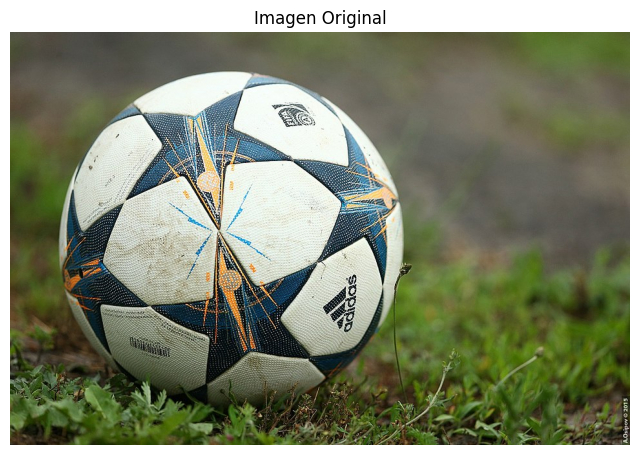

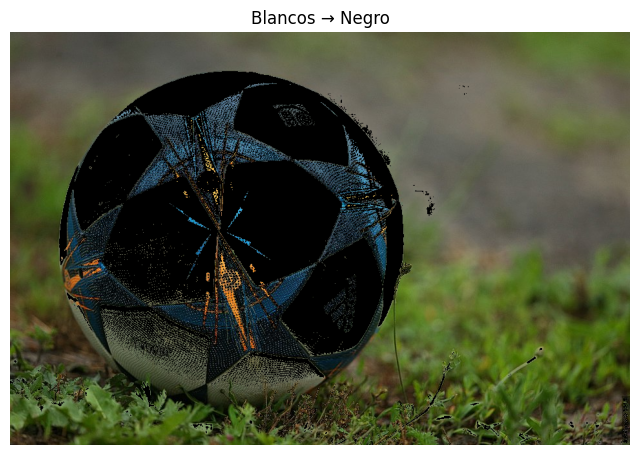

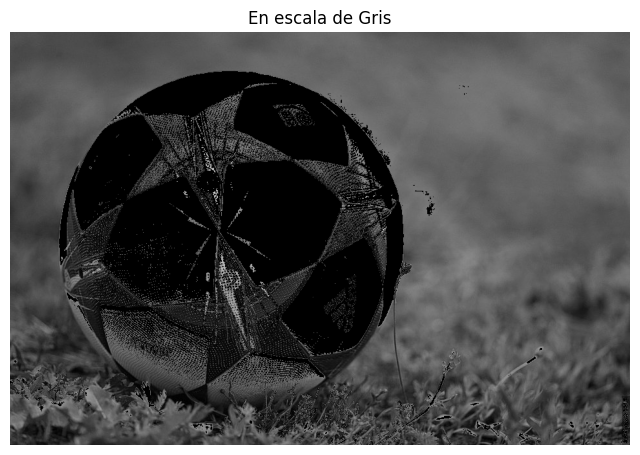

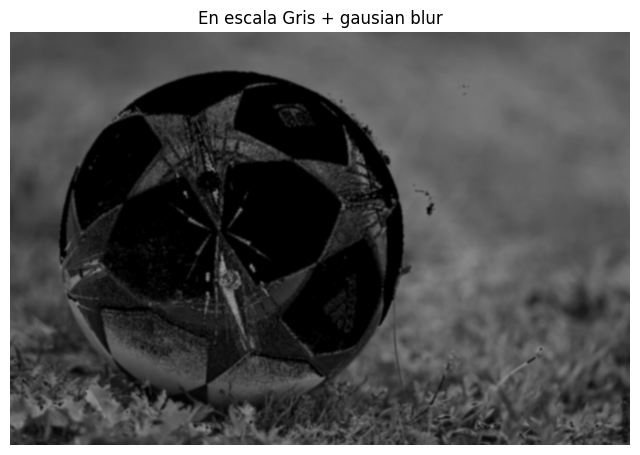

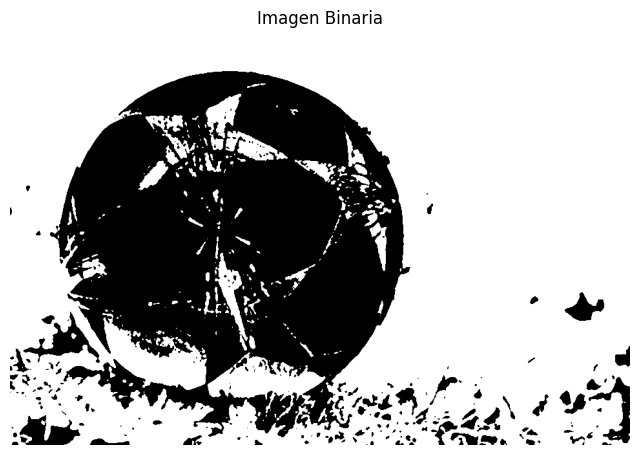

In [110]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_original = cv2.imread("p_fut.jpg")  

treshold = 108
lower_white = np.array([treshold, treshold, treshold], dtype=np.uint8)
upper_white = np.array([255, 255, 255], dtype=np.uint8)

mask = cv2.inRange(img_original, lower_white, upper_white)

result = img_original.copy()
result[mask == 255] = [0, 0, 0]  

mostrar_imagen(img_original, "Imagen Original")
mostrar_imagen(result, "Blancos → Negro")

imagen_gris = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)

mostrar_imagen(imagen_gris, "En escala de Gris")

imagen_gris = cv2.GaussianBlur(imagen_gris, (7, 7), 0)

mostrar_imagen(imagen_gris, "En escala Gris + gausian blur")

umbral = 50  
_, imagen_binaria = cv2.threshold(imagen_gris, umbral, 255, cv2.THRESH_BINARY)

mostrar_imagen(imagen_binaria, "Imagen Binaria")


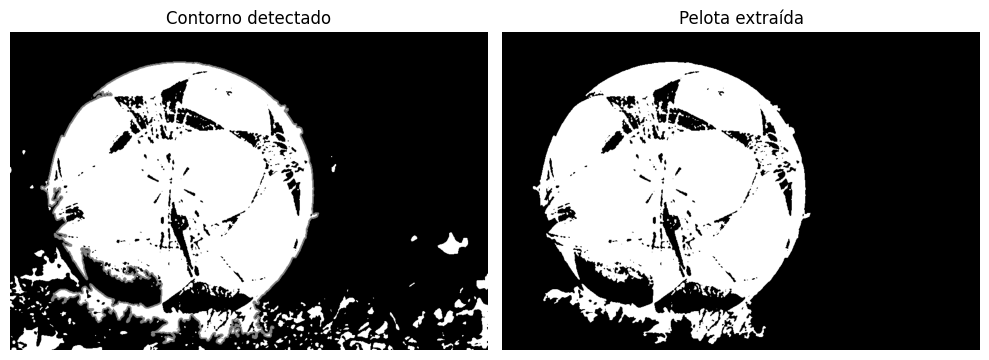

In [111]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img_inv = cv2.bitwise_not(imagen_binaria)
contornos, _ = cv2.findContours(img_inv, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if len(contornos) == 0:
    raise ValueError("No se encontraron contornos en la imagen.")

contorno_principal = max(contornos, key=cv2.contourArea)

mascara = np.zeros(img_inv.shape, dtype=np.uint8)
cv2.drawContours(mascara, [contorno_principal], -1, 255, thickness=cv2.FILLED)

pelota_extraida = cv2.bitwise_and(img_inv, img_inv, mask=mascara)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.title("Contorno detectado")
img_con_contorno = img_inv.copy()
cv2.drawContours(img_con_contorno, [contorno_principal], -1, 128, thickness=2)
plt.imshow(img_con_contorno, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Pelota extraída")
plt.imshow(pelota_extraida, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

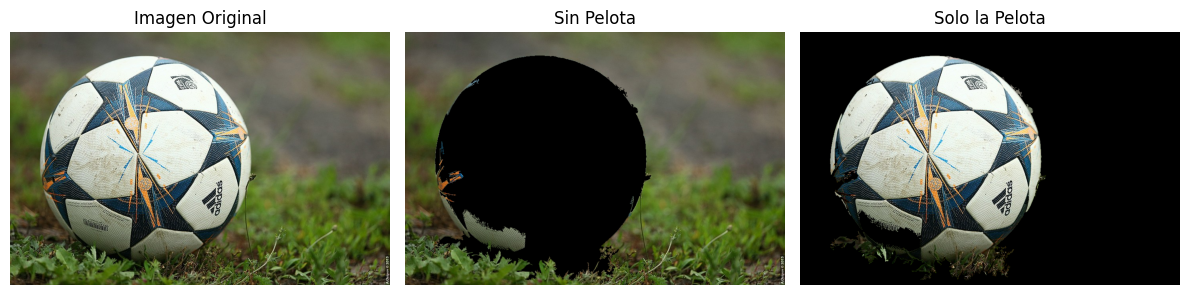

In [68]:
mascara = np.zeros(pelota_extraida.shape, dtype=np.uint8)
cv2.drawContours(mascara, [contorno_principal], -1, 255, thickness=cv2.FILLED)

mascara_invertida = cv2.bitwise_not(mascara)
img_sin_pelota = cv2.bitwise_and(img_original, img_original, mask=mascara_invertida)
pelota_sola = cv2.bitwise_and(img_original, img_original, mask=mascara)


plt.figure(figsize=(12,4))

plt.subplot(1, 3, 1)
plt.title("Imagen Original")
plt.imshow(cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Sin Pelota")
plt.imshow(cv2.cvtColor(img_sin_pelota, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Solo la Pelota")
plt.imshow(cv2.cvtColor(pelota_sola, cv2.COLOR_BGR2RGB))
plt.axis('off')


plt.tight_layout()
plt.show()

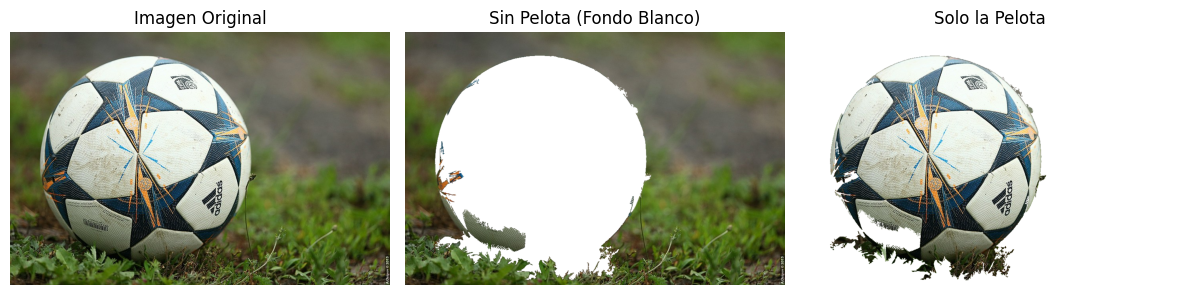

In [87]:
img_sin_pelota = img_original.copy()
img_sin_pelota[mascara == 255] = [255, 255, 255]  

mascara_fondo_inv = cv2.bitwise_not(mascara)

pelota_sola = np.ones_like(img_original, dtype=np.uint8) * 255

pelota_sola[mascara == 255] = img_original[mascara == 255]

plt.figure(figsize=(12,4))

plt.subplot(1, 3, 1)
plt.title("Imagen Original")
plt.imshow(cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Sin Pelota (Fondo Blanco)")
plt.imshow(cv2.cvtColor(img_sin_pelota, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Solo la Pelota")
plt.imshow(cv2.cvtColor(pelota_sola, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()

## Utilizando HoughCircles

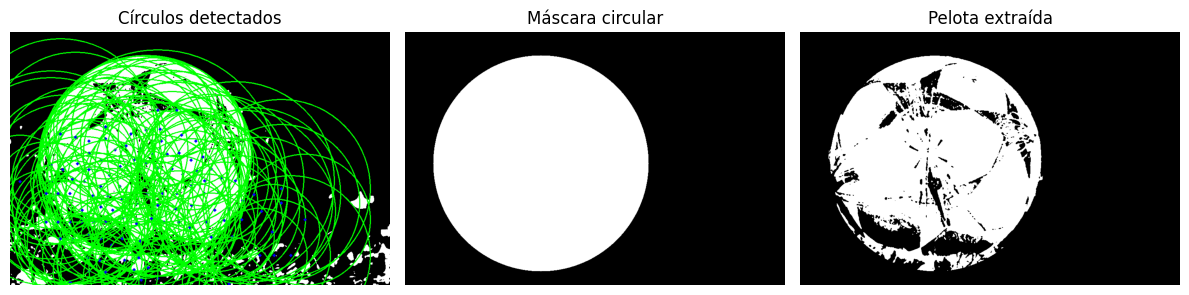

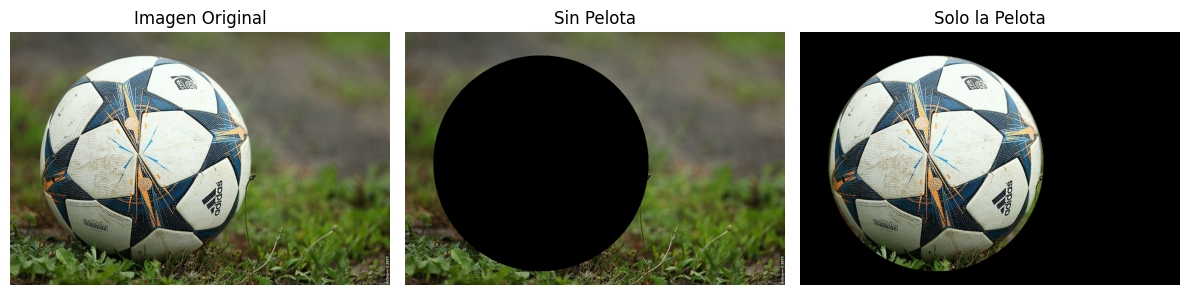

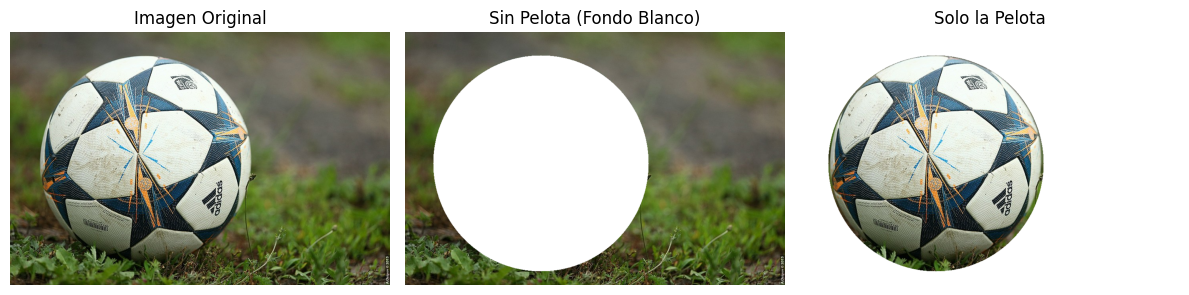

In [125]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_inv = cv2.bitwise_not(imagen_binaria)
img_blur = cv2.medianBlur(img_inv, 5)  

circulos = cv2.HoughCircles(
    img_blur,
    cv2.HOUGH_GRADIENT,
    dp=1.2,
    minDist=30,
    param1=100,
    param2=30,
    minRadius=100,
    maxRadius=300
)


output = cv2.cvtColor(img_inv, cv2.COLOR_GRAY2BGR)

if circulos is not None:
    circulos = np.uint16(np.around(circulos))
    for i in circulos[0, :]:
        # dibuja el círculo exterior
        cv2.circle(output, (i[0], i[1]), i[2], (0, 255, 0), 2)
        # dibuja el centro del círculo
        cv2.circle(output, (i[0], i[1]), 2, (0, 0, 255), 3)
else:
    raise ValueError("No se detectaron círculos.")


x, y, r = circulos[0][0]
mascara_circular = np.zeros_like(img_inv)
cv2.circle(mascara_circular, (x, y), r, 255, thickness=-1)
pelota_extraida = cv2.bitwise_and(img_inv, img_inv, mask=mascara_circular)


plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.title("Círculos detectados")
plt.imshow(output)
plt.axis('off')

plt.subplot(1,3,2)
plt.title("Máscara circular")
plt.imshow(mascara_circular, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title("Pelota extraída")
plt.imshow(pelota_extraida, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

mascara_invertida = cv2.bitwise_not(mascara_circular)
img_sin_pelota = cv2.bitwise_and(img_original, img_original, mask=mascara_invertida)
pelota_extraida = cv2.bitwise_and(img_original, img_original, mask=mascara_circular)


plt.figure(figsize=(12,4))

plt.subplot(1, 3, 1)
plt.title("Imagen Original")
plt.imshow(cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Sin Pelota")
plt.imshow(cv2.cvtColor(img_sin_pelota, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Solo la Pelota")
plt.imshow(cv2.cvtColor(pelota_extraida, cv2.COLOR_BGR2RGB))
plt.axis('off')


plt.tight_layout()
plt.show()

img_sin_pelota[mascara_circular == 255] = [255, 255, 255]  

mascara_fondo_inv = cv2.bitwise_not(mascara_circular)

pelota_sola = np.ones_like(img_original, dtype=np.uint8) * 255

pelota_sola[mascara_circular == 255] = img_original[mascara_circular == 255]

plt.figure(figsize=(12,4))

plt.subplot(1, 3, 1)
plt.title("Imagen Original")
plt.imshow(cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Sin Pelota (Fondo Blanco)")
plt.imshow(cv2.cvtColor(img_sin_pelota, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Solo la Pelota")
plt.imshow(cv2.cvtColor(pelota_sola, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()

## Aproximacion de Poligonos

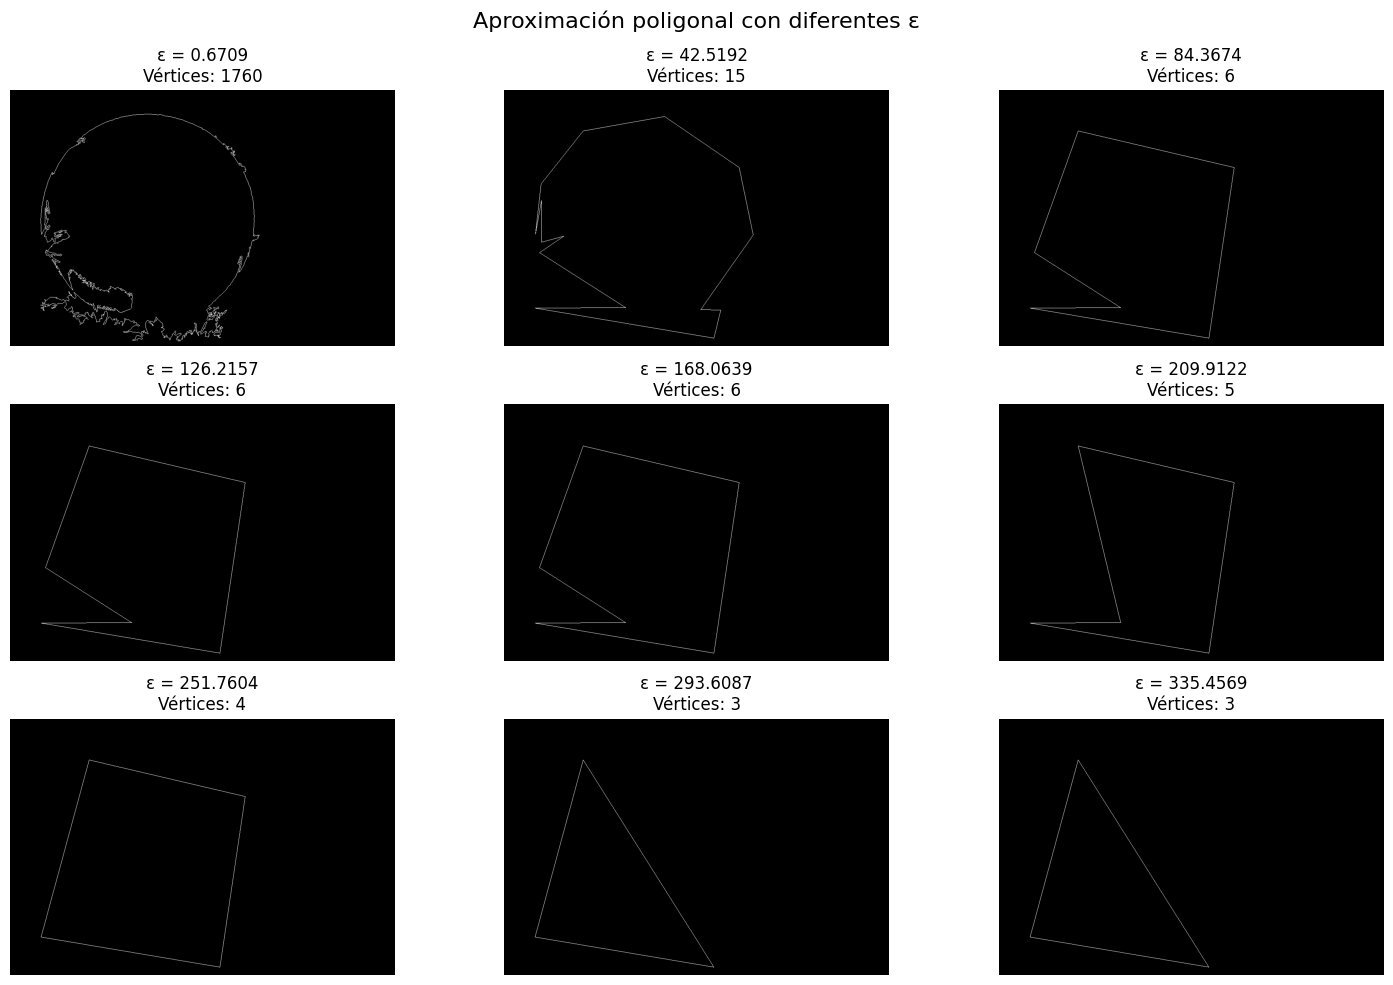

In [71]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

perimetro = cv2.arcLength(contorno_principal, True)
epsilons = np.linspace(0.0001, 0.05, 9) * perimetro  

for i, epsilon in enumerate(epsilons):
    poligono = cv2.approxPolyDP(contorno_principal, epsilon, True)
    
    canvas = np.zeros_like(imagen_binaria)
    cv2.drawContours(canvas, [poligono], -1, 255, 1)

    plt.subplot(3, 3, i + 1)
    plt.imshow(canvas, cmap='gray')
    plt.title(f"ε = {epsilon:.4f}\nVértices: {len(poligono)}")
    plt.axis('off')

plt.suptitle("Aproximación poligonal con diferentes ε", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()